In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [10]:
data <- data.frame(x=c(rep(2,500), rep(5,500), rep(10,500), rep(20,500), rep(25,500), rep(30,500)), y=NA)
data$y[1:72] <- 1
data$y[73:500] <- 0
data$y[501:603] <- 1
data$y[604:1000]<- 0
data$y[1001:1170] <- 1
data$y[1171:1500] <- 0
data$y[1501:1796] <- 1
data$y[1797:2000] <- 0
data$y[2001:2406] <- 1
data$y[2406:2500] <- 0
data$y[2501:2949] <- 1
data$y[2950:3000] <- 0
head(data)

,x,y
,<dbl>,<dbl>
1,2,1
2,2,1
3,2,1
4,2,1
5,2,1
6,2,1


In [11]:
logistic.model <- glm(y~x, data, family = "binomial")
summary(logistic.model)


Call:
glm(formula = y ~ x, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0598  -0.6648  -0.5521   0.6895   1.9781  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.075167   0.084813  -24.47   <2e-16 ***
x            0.135626   0.004768   28.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4158.8  on 2999  degrees of freedom
Residual deviance: 3065.5  on 2998  degrees of freedom
AIC: 3069.5

Number of Fisher Scoring iterations: 3


In [36]:
bottle <- data.frame(rbind(c(2,5,10,20,25,30), rep(500, 6), c(72,103,180,296,406,449)), row.names = c("x","n","y"))
colnames(bottle) <- seq(1,6)
bottle <- data.frame(t(bottle))
bottle

,x,n,y
,<dbl>,<dbl>,<dbl>
1,2,500,72
2,5,500,103
3,10,500,180
4,20,500,296
5,25,500,406
6,30,500,449


In [45]:
k <- cbind(bottle$y, bottle$n - bottle$y)
summary(glm(k~bottle$x, family=binomial))


Call:
glm(formula = k ~ bottle$x, family = binomial)

Deviance Residuals: 
       1         2         3         4         5         6  
-0.09855   0.14989   1.24780  -3.07327   1.19393   1.20074  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.039332   0.084130  -24.24   <2e-16 ***
bottle$x     0.134705   0.004753   28.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1095.762  on 5  degrees of freedom
Residual deviance:   13.901  on 4  degrees of freedom
AIC: 55.165

Number of Fisher Scoring iterations: 3


In [49]:
model.grouped <- glm(k~bottle$x, family=binomial)
round(model.grouped$fitted.values,3)

1     2     3     4     5     6 
0.146 0.203 0.334 0.658 0.791 0.881

In [50]:
toxicity <- data.frame(x=c(1,2,3,4,5,6), n=c(250,250,250,250,250,250), y=c(28,53,93,126,172,197))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"
Warning message in sqrt(sum.squares/one.delta):
"NaNs üretimi"
Warning message in stats::qt(level/2 + 0.5, pred$df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"max için eksik olmayan argüman yok; -Inf döndürülüyor"


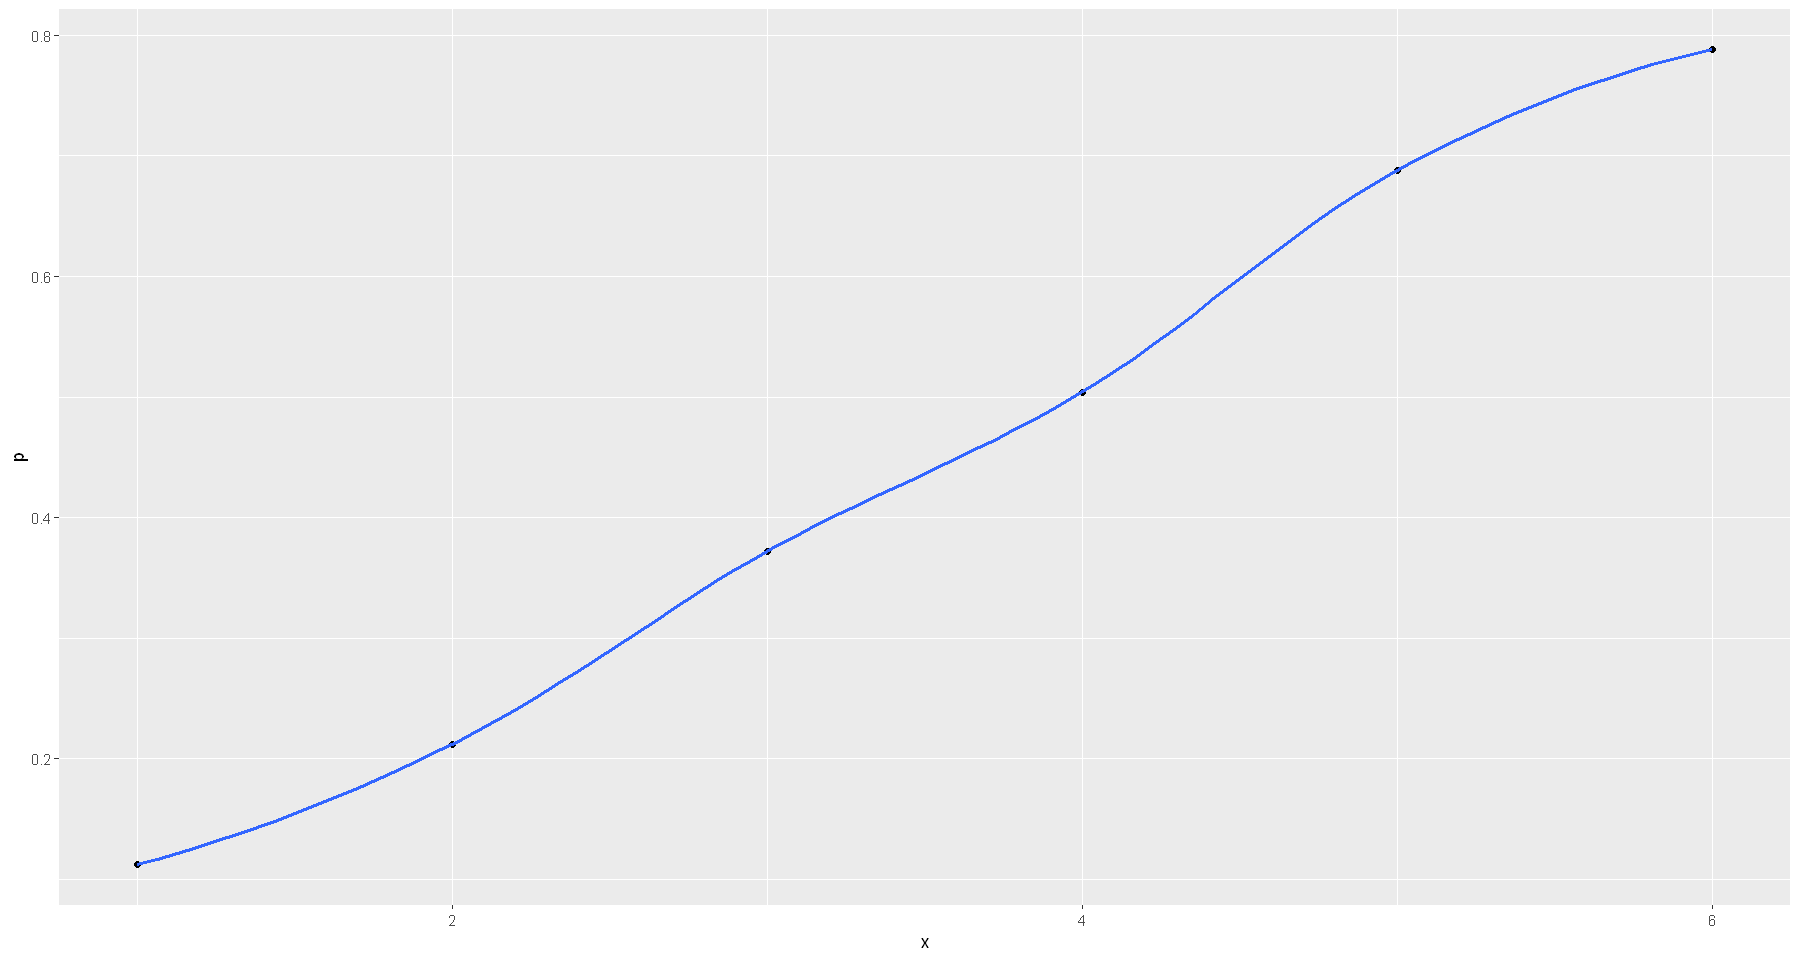

In [54]:
options(repr.plot.width=15, repr.plot.height=8)
toxicity$p <- toxicity$y/toxicity$n
toxicity %>% ggplot(aes(x,p)) + geom_point() + geom_smooth()